# Haberman Cancer Dataset

In [1]:
# objective: To predict whether the patient will survive after 5 years or not based upon the patient's age, year of treatment and the number of positive lymph nodes
# 30 age
# 64 op_Year
# 1 axil_nodes
# 1 surv_status
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

haberman = pd.read_csv("C:\\Users\\user\\Downloads\\haberman.csv", header=None, names=['age', 'op_year', 'axil_nodes', 'surv_status'])
print(haberman.head())

   age  op_year  axil_nodes  surv_status
0   30       64           1            1
1   30       62           3            1
2   30       65           0            1
3   31       59           2            1
4   31       65           4            1


In [2]:
print(haberman.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age            306 non-null int64
op_year        306 non-null int64
axil_nodes     306 non-null int64
surv_status    306 non-null int64
dtypes: int64(4)
memory usage: 9.7 KB
None


In [3]:
# print the unique valuesof the target column
print(list(haberman['surv_status'].unique()))

[1, 2]


In [4]:
# modify the target column values to be meaningful as well as categorical
haberman['surv_status'] = haberman['surv_status'].map({1:"yes", 2:"no"})
haberman['surv_status'] = haberman['surv_status'].astype('category')
print(haberman.head())

   age  op_year  axil_nodes surv_status
0   30       64           1         yes
1   30       62           3         yes
2   30       65           0         yes
3   31       59           2         yes
4   31       65           4         yes


In [5]:
print(haberman.describe())


              age     op_year  axil_nodes
count  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144
std     10.803452    3.249405    7.189654
min     30.000000   58.000000    0.000000
25%     44.000000   60.000000    0.000000
50%     52.000000   63.000000    1.000000
75%     60.750000   65.750000    4.000000
max     83.000000   69.000000   52.000000


In [6]:
print("Target variable distribution")
print(haberman.iloc[:,-1].value_counts())
print(haberman.iloc[:,-1].value_counts(normalize = True))

Target variable distribution
yes    225
no      81
Name: surv_status, dtype: int64
yes    0.735294
no     0.264706
Name: surv_status, dtype: float64


# Bivariate Analysis(scatter plots, pair-plots) 

# scatter plot

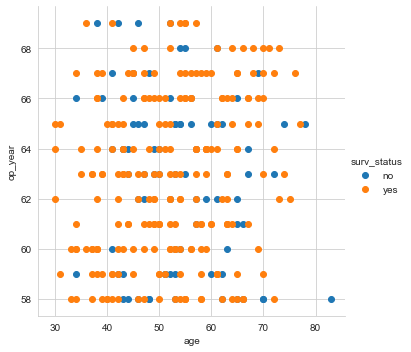

In [7]:

"""
* Distribution plots are used to visually assess how the data points are distributed with respect to its frequency.
* Usually the data points are grouped into bins and the height of the bars representing each group increases with increase in the number of data points 
lie within that group. (histogram)
* Probality Density Function (PDF) is the probabilty that the variable takes a value x. (smoothed version of the histogram)
* Kernel Density Estimate (KDE) is the way to estimate the PDF. The area under the KDE curve is 1.
* Here the height of the bar denotes the percentage of data points under the corresponding group
"""
sns.set_style('whitegrid');
sns.FacetGrid(haberman, hue="surv_status", height=5) \
   .map(plt.scatter, "age", "op_year") \
   .add_legend();
plt.show();


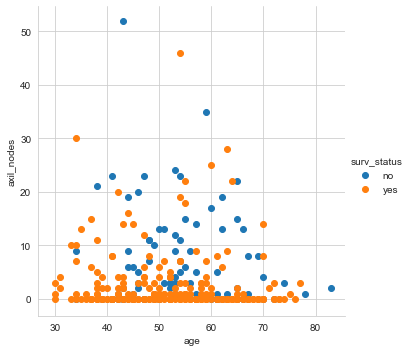

In [8]:
sns.set_style('whitegrid');
sns.FacetGrid(haberman, hue="surv_status", height=5) \
   .map(plt.scatter, "age", "axil_nodes") \
   .add_legend();
plt.show();

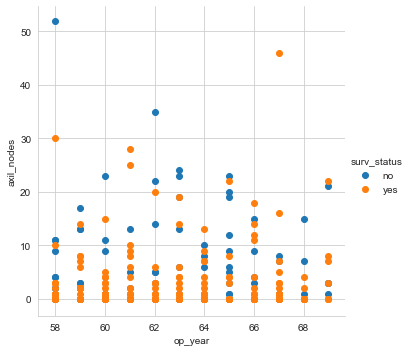

In [9]:
sns.set_style('whitegrid');
sns.FacetGrid(haberman, hue="surv_status", height=5) \
   .map(plt.scatter, "op_year", "axil_nodes") \
   .add_legend();
plt.show();

# Pair Plot

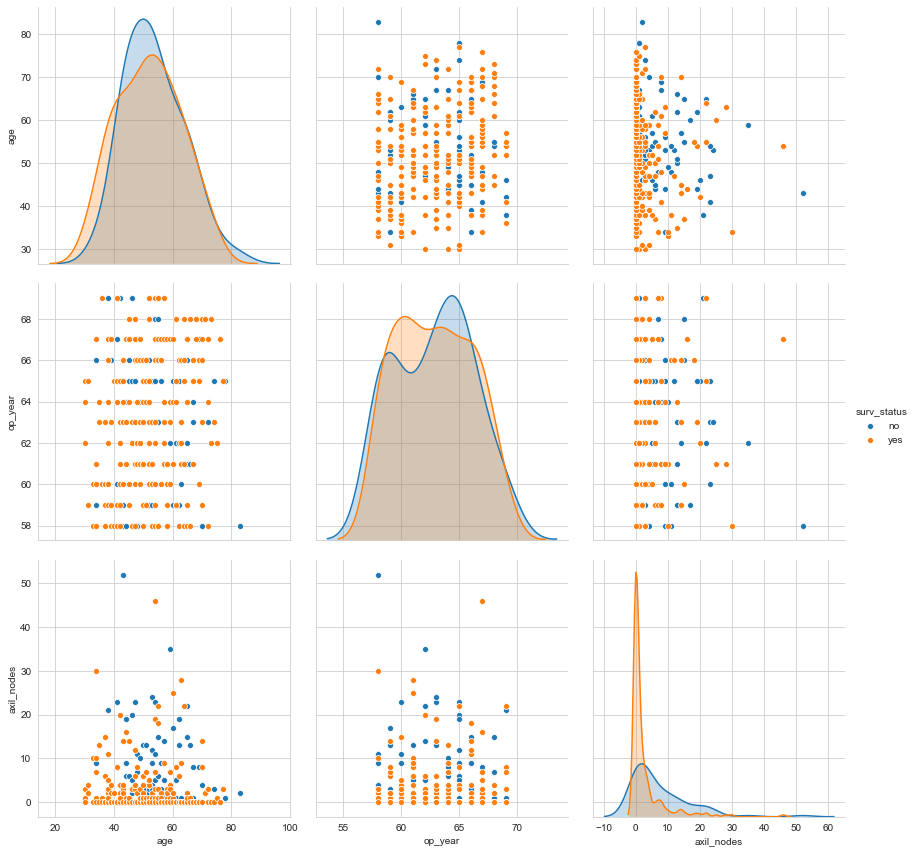

In [10]:
plt.close();
sns.set_style('whitegrid');
sns.pairplot(haberman, hue="surv_status", height=4);
plt.show();


In [11]:
# observation:we can see the better seperation between the two clases than other scatter plots by scattering datapoints between axil_nodes and op_year 

# univariate Analysis(PDF, CDF, Boxplot, Voilin plots)

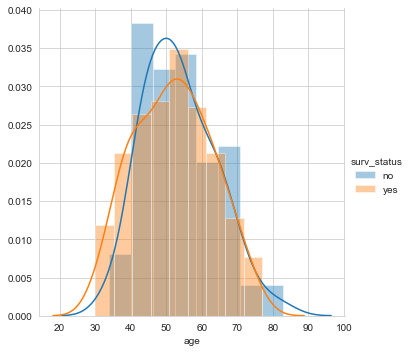

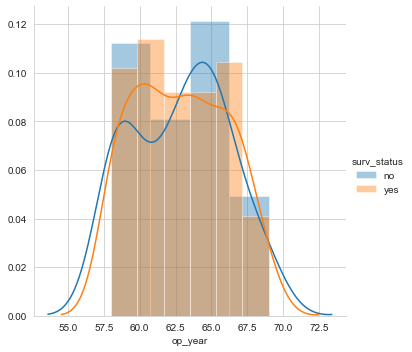

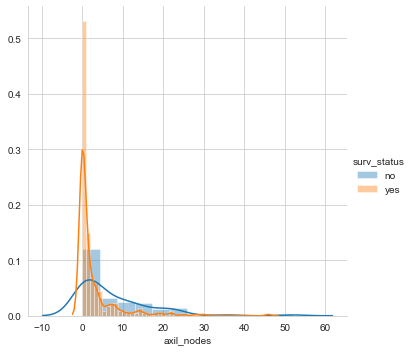

In [12]:
for i, feature in enumerate(list(haberman.columns)[:-1]):
    a = sns.FacetGrid(haberman, hue='surv_status', height=5)
    a.map(sns.distplot, feature).add_legend()
    plt.show()

# pdf, cdf

********* age *********
Bin Edges: [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
PDF: [0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
CDF: [0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]
********* op_year *********
Bin Edges: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
PDF: [0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
CDF: [0.20588235 0.29738562 0.38235294 0.45751634 0.55555556 0.65686275
 0.74836601 0.83986928 0.92156863 1.        ]
********* axil_nodes *********
Bin Edges: [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
PDF: [0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
CDF: [0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.99673203 1.        ]


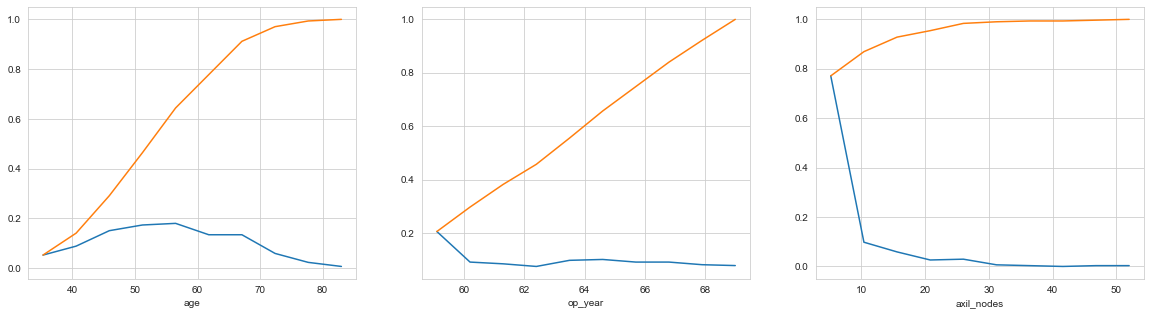

In [13]:
plt.figure(figsize=(20,5))
for i, feature in enumerate(list(haberman.columns)[:-1]):
    plt.subplot(1, 3, i+1)
    print("********* "+feature+" *********")
    counts, bin_edges = np.histogram(haberman[feature], bins=10, density=True)
    print("Bin Edges: {}".format(bin_edges))
    pdf = counts/sum(counts)
    print("PDF: {}".format(pdf))
    cdf = np.cumsum(pdf)
    print("CDF: {}".format(cdf))
    plt.plot(bin_edges[1:], pdf, bin_edges[1:], cdf)
    plt.xlabel(feature)

# Box plot

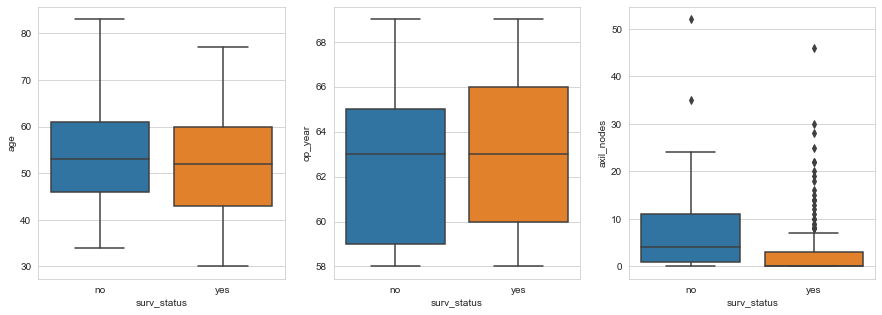

In [14]:
"""
Box plot takes a less space and visually represents the five number summary of the data points in a box. 
The outliers are displayed as points outside the box.
1. Q1 - 1.5*IQR
2. Q1 (25th percentile)
3. Q2 (50th percentile or median)
4. Q3 (75th percentile)
5. Q3 + 1.5*IQR
Inter Quartile Range = Q3 -Q1
"""
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, feature in enumerate(list(haberman.columns)[:-1]):
    sns.boxplot( x='surv_status', y=feature, data=haberman, ax=axes[i])
plt.show()  

# Violin plot

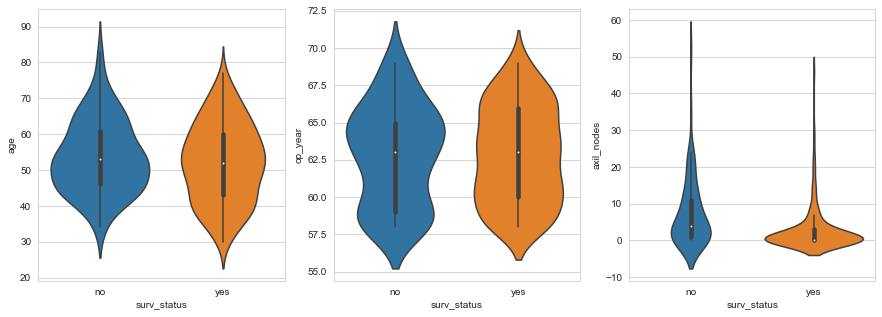

In [15]:
"""
Violin plot is the combination of box plot and probability density function.
"""
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, feature in enumerate(list(haberman.columns)[:-1]):
    sns.violinplot( x='surv_status', y=feature, data=haberman, ax=axes[i])
plt.show()
# observations: The number of positive lymph nodes of the survivors is highly densed from 0 to 
#               Almost 80% of the patients have less than or equal to 10 positive lymph node
#               The patients treated after 1966 have the slighlty higher chance to surive that the rest. The patients treated before 1959 have the slighlty lower chance to surive that the rest.

In [16]:
# observations: The number of positive lymph nodes of the survivors is highly densed from 0 to 
#               Almost 80% of the patients have less than or equal to 10 positive lymph node
#               The patients treated after 1966 have the slighlty higher chance to surive that the rest. The patients treated before 1959 have the slighlty lower chance to surive that the rest.